# **LAPORAN PRAKTIKUM**
*Laporan diperuntukan sebagai pemenuh syarat penilaian praktikum mata kuliah Deep Learning*

```
Dosen Pengampu : Sevi Nurafni
Oleh : Catherine V. Pang 2C2220008 VI/A
Hari, Tanggal: Selasa, 07 April 2025
Pertemuan Ke: 3
Topik: Membangun Model CNN untuk Klasifikasi Gambar

PROGRAM STUDI S1 SAINS DATA FAKULTAS SAINS DAN TEKNOLOGI UNIVERSITAS KOPERASI INDONESIA 2025
```

#Model Contoh

### Import Library

In [ ]:
# Import semua library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models


### Mengambil dan Mengeksplorasi Dataset

Dataset yang digunakan adalah dataset Fashion MNIST, terdiri dari 70.000 gambar grayscale berukuran 28x28 piksel.

Setiap gambar mewakili jenis pakaian tertentu (seperti sepatu, baju, celana).

Data dibagi dua: 60.000 untuk pelatihan dan 10.000 untuk pengujian.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Visualisasi Data

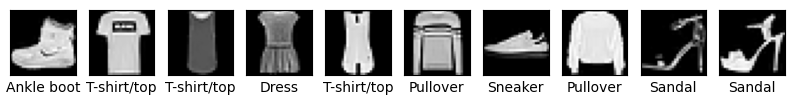

In [ ]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()


### Preprocessing / Normalisasi

Nilai piksel awalnya 0–255. Kita ubah ke 0–1 agar model belajar lebih cepat dan stabil.

reshape digunakan untuk menambahkan channel (warna) ke data (dari bentuk 28x28 → 28x28x1), yang dibutuhkan oleh layer CNN.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


### Membangun Arsitektur CNN

Layer	→ Fungsi

Conv2D	→   Mendeteksi pola dari gambar (misalnya tepi, sudut).

MaxPooling2D	→ Mengurangi ukuran gambar sambil mempertahankan informasi penting.

Flatten	→ Mengubah hasil dari 2D menjadi 1D agar bisa masuk ke layer Dense.

Dense	→ Layer fully connected untuk klasifikasi.

softmax →	Mengubah output menjadi probabilitas untuk 10 kelas.

In [ ]:
 model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


### Kompilasi dan Pelatihan Model

Optimizer adam: metode untuk mempercepat proses belajar.

Loss: sparse_categorical_crossentropy cocok untuk label berbentuk angka (bukan one-hot).

Metrics: kita ingin tahu akurasi model.


Kita latih model selama 5 epoch (pengulangan seluruh data training).
Kita evaluasi juga dengan data test agar tahu apakah model overfitting atau tidak.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.7726 - loss: 0.6369 - val_accuracy: 0.8735 - val_loss: 0.3518
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.8821 - loss: 0.3252 - val_accuracy: 0.8685 - val_loss: 0.3473
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.8997 - loss: 0.2732 - val_accuracy: 0.8974 - val_loss: 0.2841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9108 - loss: 0.2402 - val_accuracy: 0.8934 - val_loss: 0.2787
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - accuracy: 0.9217 - loss: 0.2130 - val_accuracy: 0.9020 - val_loss: 0.2693


### Evaluasi Model

Kita cek performa model terhadap data yang tidak pernah dilihat sebelumnya (data test).
Semakin tinggi akurasi, semakin bagus modelnya.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nAkurasi pada data test:', test_acc)


313/313 - 3s - 8ms/step - accuracy: 0.9020 - loss: 0.2693

Akurasi pada data test: 0.9020000100135803


### Prediksi dan Visualisasi

Model memberikan 10 nilai probabilitas, satu untuk setiap kelas.
Kita ambil nilai tertinggi (np.argmax) sebagai prediksi.
Lalu bandingkan hasil prediksi dengan label asli.

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


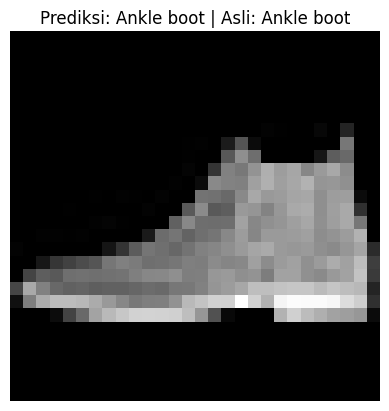

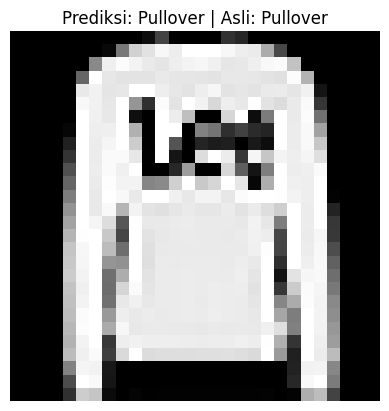

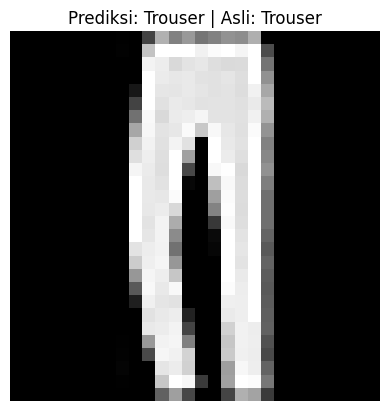

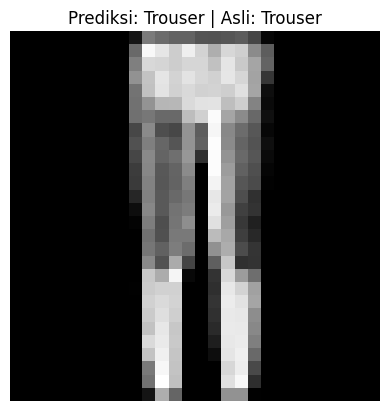

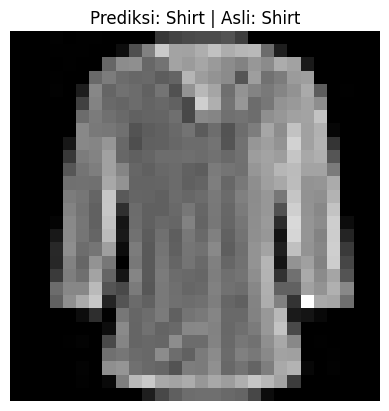

In [ ]:
predictions = model.predict(test_images)

for i in range(5):
    plt.imshow(test_images[i].reshape(28,28), cmap='gray')
    plt.title(f"Prediksi: {class_names[np.argmax(predictions[i])]} | Asli: {class_names[test_labels[i]]}")
    plt.axis('off')
    plt.show()


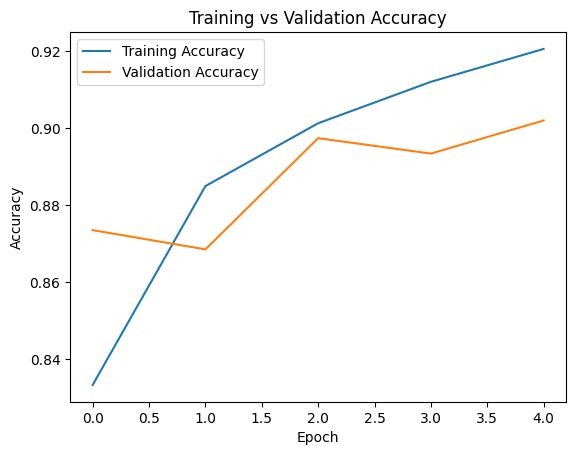

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


### Maksudnya

### Pola Akurasi:

Training Accuracy terus meningkat (dari 83% ke 92%)

Validation Accuracy juga cukup stabil dan ikut meningkat, meskipun sedikit fluktuatif:
- Turun sedikit di epoch ke-1
- Naik tajam di epoch ke-2
- Fluktuatif sedikit setelahnya, tapi masih sejalan dengan training


### Interpretasi:
Tidak overfitting ➜ Model kamu menunjukkan generalisasi yang baik karena validation accuracy masih tinggi dan nggak menjauh jauh dari training accuracy.

Belum maksimal juga ➜ Ada sedikit gap (selisih kecil antara training dan validation), jadi masih bisa ditingkatkan.

 **Tugas:** Perbaiki/Bangun model CNN yang lebih dari ini

#Pengerjaan Tugas

In [ ]:
# 1. Import Library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# 2. Load Dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:

# 3. Preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


In [ ]:
# 4. Bangun Model CNN yang lebih kuat
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# 5. Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 6. Tambahkan Early Stopping
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:

# 7. Latih Model
history = model.fit(train_images, train_labels,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=2)

Epoch 1/30
750/750 - 14s - 18ms/step - accuracy: 0.7504 - loss: 0.6948 - val_accuracy: 0.8548 - val_loss: 0.3857
Epoch 2/30
750/750 - 4s - 5ms/step - accuracy: 0.8434 - loss: 0.4355 - val_accuracy: 0.8787 - val_loss: 0.3207
Epoch 3/30
750/750 - 5s - 7ms/step - accuracy: 0.8658 - loss: 0.3778 - val_accuracy: 0.8889 - val_loss: 0.2925
Epoch 4/30
750/750 - 4s - 5ms/step - accuracy: 0.8795 - loss: 0.3419 - val_accuracy: 0.8994 - val_loss: 0.2727
Epoch 5/30
750/750 - 5s - 7ms/step - accuracy: 0.8872 - loss: 0.3195 - val_accuracy: 0.9043 - val_loss: 0.2531
Epoch 6/30
750/750 - 4s - 5ms/step - accuracy: 0.8924 - loss: 0.2997 - val_accuracy: 0.8994 - val_loss: 0.2653
Epoch 7/30
750/750 - 4s - 5ms/step - accuracy: 0.8959 - loss: 0.2890 - val_accuracy: 0.9110 - val_loss: 0.2368
Epoch 8/30
750/750 - 5s - 6ms/step - accuracy: 0.9010 - loss: 0.2777 - val_accuracy: 0.9070 - val_loss: 0.2434
Epoch 9/30
750/750 - 4s - 5ms/step - accuracy: 0.9046 - loss: 0.2675 - val_accuracy: 0.8936 - val_loss: 0.2780

In [ ]:

# 8. Evaluasi Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')


Test accuracy: 0.9186


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


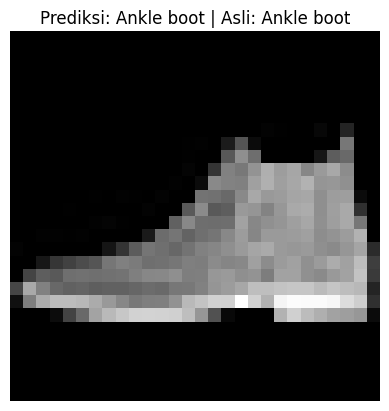

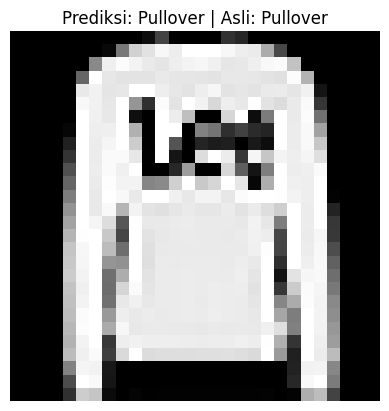

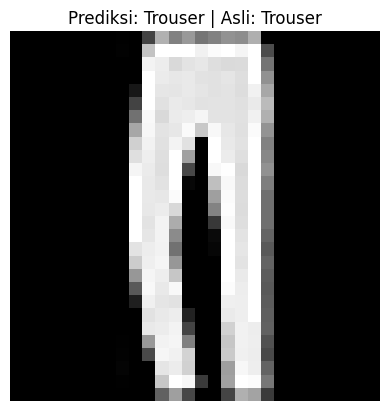

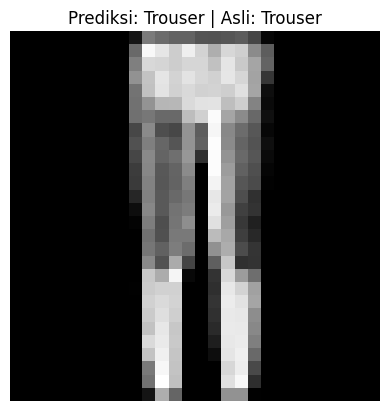

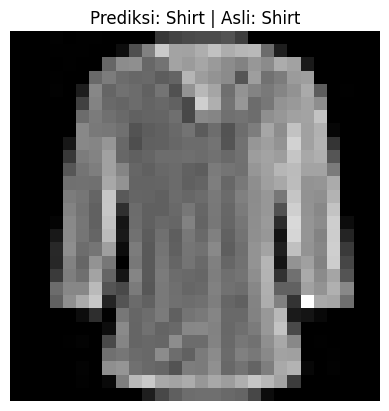

In [ ]:
# 9. Prediksi dan Visualisasi 5 Gambar Pertama
predictions = model.predict(test_images)

for i in range(5):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Prediksi: {class_names[np.argmax(predictions[i])]} | Asli: {class_names[test_labels[i]]}")
    plt.axis('off')
    plt.show()

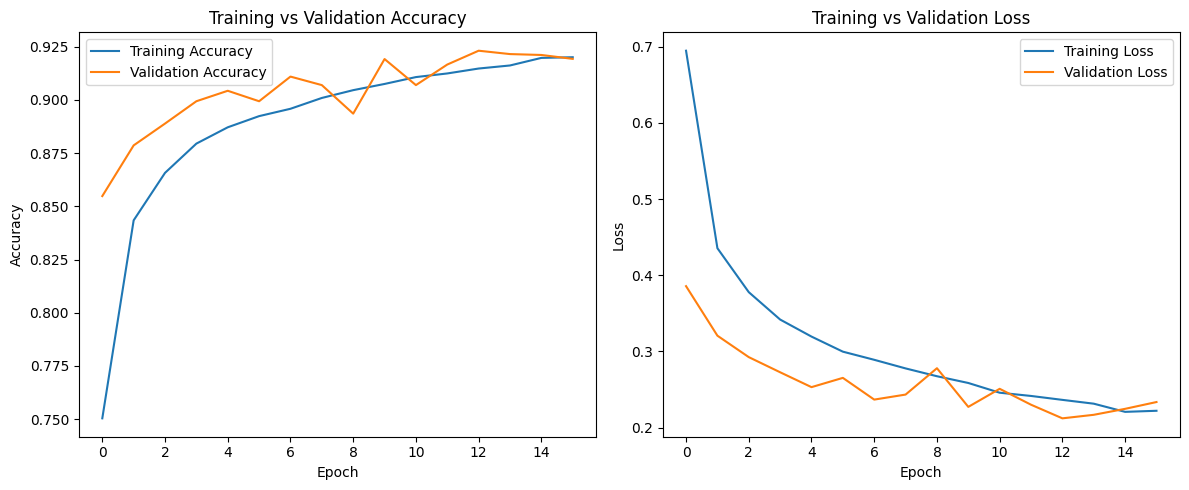

In [ ]:
# 10. Visualisasi Akurasi & Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.tight_layout()
plt.show()